In [252]:

import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import datetime

style.use('ggplot')


In [272]:
df = pd.read_csv("/Users/deborahedds/Downloads/temperature-timeseries-for-some-brazilian-cities/all_cities_temps.csv", index_col = 'YEAR')


In [273]:
df = df[df['CITY']=='salvador'].copy()
df.head()

,Unnamed: 0,MONTH,TEMPERATURE,CITY
YEAR,,,,
1961,0,JAN,NaN,salvador
1962,1,JAN,26.07,salvador
1963,2,JAN,NaN,salvador
1964,3,JAN,25.27,salvador
1965,4,JAN,24.96,salvador


In [274]:
df = df[['MONTH', 'TEMPERATURE', 'CITY']].reset_index()

In [275]:
df.tail()

,YEAR,MONTH,TEMPERATURE,CITY
703,2015,DEC,27.90,salvador
704,2016,DEC,27.40,salvador
705,2017,DEC,27.30,salvador
706,2018,DEC,27.15,salvador
707,2019,DEC,NaN,salvador


In [276]:
df['day']= '01'
df['date']= df['MONTH']+ '-' + df['day']  + '-' + df['YEAR'].astype(str)
df.head()

,YEAR,MONTH,TEMPERATURE,CITY,day,date
0,1961,JAN,NaN,salvador,01,JAN-01-1961
1,1962,JAN,26.07,salvador,01,JAN-01-1962
2,1963,JAN,NaN,salvador,01,JAN-01-1963
3,1964,JAN,25.27,salvador,01,JAN-01-1964
4,1965,JAN,24.96,salvador,01,JAN-01-1965


In [277]:
df['date'] = pd.to_datetime(df.date)


In [278]:
df.sort_values(by='date', inplace=True)


In [279]:
df.set_index('date', inplace = True)


In [280]:
df = df[['TEMPERATURE']]
df.head(20)

,TEMPERATURE
date,
1961-01-01,NaN
1961-02-01,NaN
1961-03-01,NaN
1961-04-01,NaN
1961-05-01,NaN
1961-06-01,NaN
1961-07-01,NaN
1961-08-01,NaN
1961-09-01,NaN


In [281]:
df.count()

TEMPERATURE    613
dtype: int64

In [282]:
forecast_col = 'TEMPERATURE'
df.fillna(df.mean(), inplace = True)
#df.dropna(inplace = True)

In [283]:
df.head()

,TEMPERATURE
date,
1961-01-01,25.072186
1961-02-01,25.072186
1961-03-01,25.072186
1961-04-01,25.072186
1961-05-01,25.072186


In [284]:
#forecast_out = int(math.ceil(0.018*len(df)))
forecase_out = 12

In [285]:
df['label']=df[forecast_col].shift(-forecast_out)
df.head()

,TEMPERATURE,label
date,,
1961-01-01,25.072186,26.07
1961-02-01,25.072186,25.97
1961-03-01,25.072186,26.07
1961-04-01,25.072186,25.77
1961-05-01,25.072186,24.47


In [286]:
X = np.array(df.drop(['label'], 1))

X= preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]
df.dropna(inplace= True)

y = np.array(df['label'])

In [287]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X , y, test_size=0.2)
clf= LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.5437126161953666


In [288]:
forecast_set = clf.predict(X_lately)


In [289]:
print(forecast_set, accuracy, forecast_out)


[27.01847837 27.0939444  25.07310451 25.07310451 25.07310451 25.07310451
 25.07310451 25.07310451 25.07310451 25.07310451 26.37701713 26.64114823] 0.5437126161953666 12


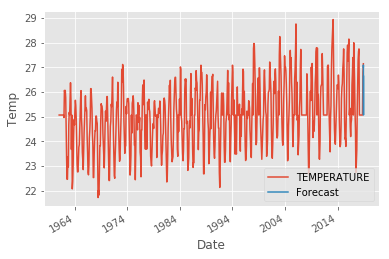

In [290]:
df['Forecast']= np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day


for i in forecast_set:
    next_date=datetime.fromtimestamp(next_unix)
    next_unix+= one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) -1)] + [i]
    
df['TEMPERATURE'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Temp')
plt.show()